# Python 101
## Part XI.
---

## Time series

In [52]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    pass

---
### Act I: Read OTP stock pritces (lack of creativity, I know)

Read data from the xls file.

In [53]:
BASE = './data/'

Read data from excel file.

In [54]:
df = pd.read_excel(io=BASE+'currency_rates.xlsx', sheetname='data')
df.head()

,Date,EUR/USD Close,EUR/USD High,EUR/USD Low,GBP/USD Close,GBP/USD High,GBP/USD Low,EUR/GBP Close,EUR/GBP High,EUR/GBP Low
0,2015-11-13,1.07436,1.08170,1.07144,1.52270,1.52640,1.51880,0.70545,0.71070,0.70418
1,2015-11-16,1.06823,1.07580,1.06749,1.52030,1.52321,1.51817,0.70250,0.70800,0.70219
2,2015-11-17,1.06480,1.06909,1.06308,1.52130,1.52385,1.51548,0.69985,0.70330,0.69850
3,2015-11-18,1.06542,1.06925,1.06175,1.52368,1.52485,1.51886,0.69921,0.70201,0.69832
4,2015-11-19,1.07330,1.07630,1.06559,1.52850,1.53355,1.52278,0.70188,0.70280,0.69820


Convert date strings into dates, and set them as index (also sort the column).

In [55]:
#               convert a column into date
#df['Date'] = pd.to_datetime(df['Date'])
#       set it as index   sort the index
df = df.set_index('Date').sort_index()
#f.head()

Get the basic statistics about the data.

Minimum

In [56]:
df.min()

EUR/USD Close    1.05697
EUR/USD High     1.05948
EUR/USD Low      1.05236
GBP/USD Close    1.21255
GBP/USD High     1.22020
GBP/USD Low      1.18067
EUR/GBP Close    0.69921
EUR/GBP High     0.70201
EUR/GBP Low      0.69820
dtype: float64

Maximum

In [57]:
df.max()

EUR/USD Close    1.15182
EUR/USD High     1.16162
EUR/USD Low      1.15013
GBP/USD Close    1.52850
GBP/USD High     1.53355
GBP/USD Low      1.52278
EUR/GBP Close    0.91151
EUR/GBP High     0.94526
EUR/GBP Low      0.90024
dtype: float64

Mean

In [58]:
df.mean()

EUR/USD Close    1.110086
EUR/USD High     1.114641
EUR/USD Low      1.105708
GBP/USD Close    1.389731
GBP/USD High     1.397531
GBP/USD Low      1.382937
EUR/GBP Close    0.801938
EUR/GBP High     0.806071
EUR/GBP Low      0.797600
dtype: float64

Get everything at once

In [59]:
df.describe()

,EUR/USD Close,EUR/USD High,EUR/USD Low,GBP/USD Close,GBP/USD High,GBP/USD Low,EUR/GBP Close,EUR/GBP High,EUR/GBP Low
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,1.110086,1.114641,1.105708,1.389731,1.397531,1.382937,0.801938,0.806071,0.797600
std,0.019820,0.019829,0.020139,0.086002,0.085861,0.086682,0.054093,0.054961,0.054066
min,1.056970,1.059480,1.052360,1.212550,1.220200,1.180670,0.699210,0.702010,0.698200
25%,1.095570,1.099870,1.090390,1.313630,1.324800,1.307470,0.768190,0.771700,0.761450
50%,1.113380,1.117900,1.108070,1.422400,1.429070,1.413200,0.788900,0.791870,0.785700
75%,1.124900,1.129760,1.120540,1.450700,1.460060,1.444470,0.849510,0.852600,0.846300
max,1.151820,1.161620,1.150130,1.528500,1.533550,1.522780,0.911510,0.945260,0.900240


Let's focus on closing values!

In [61]:
currencies = ['EUR/USD', 'GBP/USD', 'EUR/GBP']

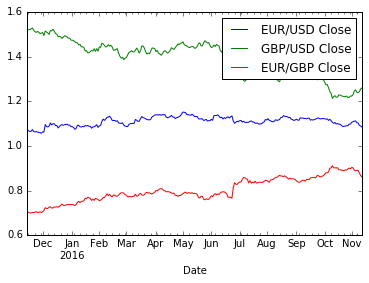

In [62]:
df[[c + ' Close' for c in currencies]].plot()

In [25]:
for index, val in :
    try:
        float(val)
    except:
        print val
#.astype(np.float32).plot()

AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [ ]:
try:
    sns.boxplot(df['Close'])
except:
    df.boxplot('Close')

Create a new column called 'diff' which is the difference between the opening and the closing prices. Plot it!

In [ ]:
df['diff'] = df['Close'] - df['Open'] 
df['diff'].plot()

Let's have a closer look at that huge drop from summer 2011!

In [ ]:
df['2011-07':'2011-09']['Close'].plot()

In [ ]:
try:
    sns.boxplot(df['2011-07':'2011-09']['diff'])
except:
    df['2011-07':'2011-09'].boxplot('diff')

In [ ]:
try:
    sns.boxplot(df['2011-07':'2011-09']['Close'])
except:
    df['2011-07':'2011-09'].boxplot('Close')

---
### Act II: Advanced operations

Save the closeing price to a new dataframe!

In [ ]:
# [c]loseing [p]rice [f]rame
cpf = df['Close']

#### Subact: Moving statistics

The most common operation is the moving average (rolling mean). Feel free to experiment with the window size!

In [ ]:
#                      column,      window size
mavg = pd.rolling_mean(cpf, 40)
#    shows the last five row
mavg.tail()

We plot the last 5 because:

In [ ]:
mavg.head()

Why?

---

After the answer, plot the moving average! 

In [ ]:
mavg.plot()

Put the two plot into the same axis system.

In [ ]:
cpf.plot(label='Close')
mavg.plot(label='Close AVG')
plt.legend()

We can apply several other types of functions with moving window, the complete list can be found [here](http://pandas.pydata.org/pandas-docs/stable/computation.html#moving-rolling-statistics-moments).  

---

#### Subact: Shifted computations

How can we compute something based on yesterday's data?  
Use the `shift` function!  
Let's compute the difference between the days:
$${d_t} = {p_t} - {p_{t-1}}$$

In [ ]:
df['d'] = cpf - cpf.shift(1)
df['d'].head()

In [ ]:
df['d'].describe()

In [ ]:
df['d'].plot()

In [ ]:
df[df['d'] > 0]['Close'].describe()

---
### Act III: Resampling

You can resample data to different time frequency. Two main parameters for the `resample` method is the time period you resemple to and the method that you use. By default the method is mean. The list time frames is accessable from [here](http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases).   

In [ ]:
# Monthly mean
cpf.resample('M').plot()

In [ ]:
# Weekly median
cpf.resample('W', how='median').plot()

In [ ]:
# 3 weekly minimum
cpf.resample('3W', how='min').plot()

In [ ]:
# quarter year max
cpf.resample('Q', how='max').plot()

---
### Final Act: your turn

Compute the moving sum on the "groving" days (when the price of the stock went up)!  

Compute the moving standard deviation function
$${sd} = \sqrt{{E}[({x}-\mu)^2]}$$
on the dataset with 60 window size! Plot it, and plot the resampled (quarterly, mean) dataframe into the same coordinate system (use the `style='--g'` argument in the `plot` method)!

In [ ]:
def msd(x):
    return np.sqrt(np.square(x - x.mean()).mean())